In [72]:
import numpy as np
import pandas as pd

#scikit-learn class that helps to take care of missing values
from sklearn.impute import SimpleImputer

# to handle outliers
from scipy.stats import zscore

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')


# for standardizing the features
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer

# mutual information analysis
from sklearn.feature_selection import mutual_info_classif

# for splitting training and testing data
from sklearn.model_selection import train_test_split

# for Principal Component Analysis
from sklearn.decomposition import PCA

#### Loading dataset

In [73]:
company = pd.read_csv(r"C:\Users\Kesha Patel\Desktop\Technocolabs\Data_companies\companies.csv")

In [74]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,Unnamed: 4,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,05-09-2010,18-09-2013,5.0,17.0,initial-importer,25-05-2007 06:51,13-04-2013 03:29,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,31-05-2007 21:11,23-05-2008 23:23,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,01-02-2003,23-09-2011,4.0,12.0,initial-importer,06-08-2007 23:52,04-11-2013 02:09,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,24-08-2008 16:51,06-09-2008 14:19,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,24-08-2008 17:10,06-09-2008 14:19,NaN,NaN,NaN


In [75]:
company.describe()

,Unnamed: 0.1,entity_id,Unnamed: 4,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333330


In [76]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'Unnamed: 4', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## A. Data Cleaning


#### 1. Deleting irrelevant and redundant information

In [77]:
# checking for the null values
company.isnull().sum().sort_values(ascending=False)


Unnamed: 4             196553
ROI                    195827
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
closed_at              193933
short_description      189422
funding_total_usd      168679
last_funding_at        165046
first_funding_at       165046
funding_rounds         164846
state_code             145650
twitter_username       115962
tag_list               115101
lat                    112701
lng                    112701
city                   112663
country_code           108563
founded_at             105326
first_milestone_at     104854
milestones             104854
last_milestone_at      104854
description            104505
logo_height             86443
logo_width              86443
logo_url                86443
category_code           73367
homepage_url            70008
domain                  70008
overview                69582
relationships           66886
created_by              41020
normalized

#### 1.a. Delete 'region','city' as they provide too much of granularity.

In [78]:
# deleting 'region', 'city', 'state_code', as they provide too much of granularity
company.drop(columns=['state_code','city','region'], inplace=True)
company

,id,Unnamed: 0.1,entity_type,entity_id,Unnamed: 4,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,05-09-2010,18-09-2013,5.0,17.0,initial-importer,25-05-2007 06:51,13-04-2013 03:29,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,31-05-2007 21:11,23-05-2008 23:23,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,01-02-2003,23-09-2011,4.0,12.0,initial-importer,06-08-2007 23:52,04-11-2013 02:09,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,24-08-2008 16:51,06-09-2008 14:19,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,24-08-2008 17:10,06-09-2008 14:19,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,12-08-2013,12-08-2013,2.0,5.0,NaN,06-09-2011 23:17,13-08-2013 00:39,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,01-05-2013,01-05-2013,1.0,14.0,NaN,24-08-2008 15:46,28-06-2013 20:55,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,01-01-2012,30-10-2013,3.0,44.0,NaN,24-08-2008 15:46,28-06-2013 20:52,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,24-08-2008 16:00,28-06-2013 20:56,34.052234,-118.243685,NaN


#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [79]:
# deleting 'id',  'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by','created_at', 'updated_at' as they are redundant.
company.drop(columns=['id',  'Unnamed: 0.1', 'entity_type', 'entity_id', 'created_by','created_at', 'updated_at'],inplace=True)
company.head()

,Unnamed: 4,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,17-10-2005,NaN,wetpaint-inc.com,http://wetpaint-inc.com,...,19-05-2008,3.0,39750000.0,05-09-2010,18-09-2013,5.0,17.0,47.606209,-122.332071,15.5
1,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,...,NaN,NaN,NaN,01-02-2003,23-09-2011,4.0,12.0,37.562992,-122.325525,NaN
3,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,26-07-2008,NaN,mywebbo.com,http://www.mywebbo.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,26-07-2008,NaN,themoviestreamer.com,http://themoviestreamer.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [80]:
# Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.
company.drop(columns=['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies'], inplace=True)

#### 1.d. Delete duplicate values if found any.

In [81]:
# check if there are any duplicates
company.duplicated().any()

True

In [82]:
# delete duplicate values if any

company.drop_duplicates(inplace=True)

In [83]:
company.duplicated().sum()

0

In [84]:
company.isnull().sum().sort_values(ascending=False)

Unnamed: 4             109464
ROI                    108738
first_investment_at    107217
last_investment_at     107217
investment_rounds      107213
closed_at              106845
funding_total_usd       81602
last_funding_at         77992
first_funding_at        77992
funding_rounds          77793
first_milestone_at      53353
last_milestone_at       53353
milestones              53353
relationships           34403
lat                     28363
lng                     28363
founded_at              26913
country_code            24870
category_code           12230
status                      0
dtype: int64

#### 1.e. Delete those which has more than 98% of null values.

In [85]:
#calculate the percentage of null values for each columns
print('percantage of null values in each column\n')
print((company.isnull().mean()*100).sort_values(ascending=False))

percantage of null values in each column

Unnamed: 4             100.000000
ROI                     99.336768
first_investment_at     97.947270
last_investment_at      97.947270
investment_rounds       97.943616
closed_at               97.607433
funding_total_usd       74.546883
last_funding_at         71.248995
first_funding_at        71.248995
funding_rounds          71.067200
first_milestone_at      48.740225
last_milestone_at       48.740225
milestones              48.740225
relationships           31.428598
lat                     25.910802
lng                     25.910802
founded_at              24.586165
country_code            22.719798
category_code           11.172623
status                   0.000000
dtype: float64


In [86]:
# dropping the columns that has more than 98% null values
company.drop('ROI', axis=1, inplace=True)

In [87]:
# Since we can see only nan values so let's check how much of ros has nan values.
company.isnull().sum().sort_values(ascending=False)

Unnamed: 4             109464
last_investment_at     107217
first_investment_at    107217
investment_rounds      107213
closed_at              106845
funding_total_usd       81602
last_funding_at         77992
first_funding_at        77992
funding_rounds          77793
first_milestone_at      53353
last_milestone_at       53353
milestones              53353
relationships           34403
lat                     28363
lng                     28363
founded_at              26913
country_code            24870
category_code           12230
status                      0
dtype: int64

#### 2.a.Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
(Since these are the type of data where adding value via imputation will create wrong pattern only)

In [88]:
# Define the columns to check for missing values
columns_to_check = ['status', 'country_code', 'category_code', 'founded_at']
company.dropna(subset=columns_to_check, inplace=True)


In [89]:
company

,Unnamed: 4,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,NaN,web,operating,17-10-2005,NaN,USA,NaN,NaN,NaN,01-10-2005,19-05-2008,3.0,39750000.0,05-09-2010,18-09-2013,5.0,17.0,47.606209,-122.332071
5,NaN,advertising,operating,27-06-2007,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,NaN,cleantech,operating,20-08-2008,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,NaN,advertising,operating,01-08-2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22-08-2008,22-08-2008,1.0,2.0,35.686975,-105.937799
13,NaN,web,acquired,01-10-2007,NaN,USA,NaN,NaN,NaN,26-02-2008,26-02-2008,1.0,5000000.0,01-05-2008,13-09-2012,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,NaN,ecommerce,operating,01-01-2007,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12-08-2013,12-08-2013,2.0,5.0,37.774929,-122.419415
196549,NaN,public_relations,operating,01-11-2007,NaN,USA,NaN,NaN,NaN,25-08-2008,25-08-2008,1.0,750000.0,01-05-2013,01-05-2013,1.0,14.0,37.338208,-121.886329
196550,NaN,consulting,operating,01-01-1959,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-01-2012,30-10-2013,3.0,44.0,38.882334,-77.171091
196551,NaN,search,operating,01-07-2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [90]:
# Since we can see only nan values so et's check how much of rows has nan values.
company.isnull().sum().sort_values(ascending=False)

Unnamed: 4             63585
last_investment_at     62837
first_investment_at    62837
investment_rounds      62836
closed_at              61924
funding_total_usd      43118
last_funding_at        40836
first_funding_at       40836
funding_rounds         40696
first_milestone_at     28341
last_milestone_at      28341
milestones             28341
relationships          15290
lat                     2374
lng                     2374
country_code               0
category_code              0
founded_at                 0
status                     0
dtype: int64

#### 2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

#### 2.b.1. Find the IQR

In [91]:
# For funding_total_usd
check_ftu = 'funding_total_usd'

#calculate Q1 and Q3
Q1 = company[check_ftu].quantile(0.25)
Q3 = company[check_ftu].quantile(0.75)

IQR_ftu = Q3 - Q1

In [92]:
IQR_ftu

11488962.0

In [93]:
# For funding_rounds
check_fr = 'funding_rounds'

#calculate Q1 and Q3
Q1 = company[check_fr].quantile(0.25)
Q3 = company[check_fr].quantile(0.75)

IQR_fr = Q3 - Q1

In [94]:
IQR_fr

1.0

#### 2.b.1. Find the Upper and Lower limit

In [95]:
# For funding_total_usd
lower_limit_ftu = Q1 - 1.5 * IQR_ftu
upper_limit_ftu = Q3 + 1.5 * IQR_ftu

print(f"Lower Limit for {check_ftu}: {lower_limit_ftu }")
print(f"Upper Limit for {check_ftu}: {upper_limit_ftu}")

Lower Limit for funding_total_usd: -17233442.0
Upper Limit for funding_total_usd: 17233445.0


In [96]:
# For funding_rounds
lower_limit_fr = Q1 - 1.5 * IQR_fr
upper_limit_fr = Q3 + 1.5 * IQR_fr

print(f"Lower Limit for {check_fr}: {lower_limit_fr }")
print(f"Upper Limit for {check_fr}: {upper_limit_fr}")

Lower Limit for funding_rounds: -0.5
Upper Limit for funding_rounds: 3.5


#### 2.b.1.  Find outliers

In [97]:
# For funding_total_usd
outliers_ftu = company[(company[check_ftu]< lower_limit_ftu)| (company[check_ftu]> upper_limit_ftu)]
outliers_ftu

,Unnamed: 4,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,NaN,web,operating,17-10-2005,NaN,USA,NaN,NaN,NaN,01-10-2005,19-05-2008,3.0,39750000.0,05-09-2010,18-09-2013,5.0,17.0,47.606209,-122.332071
19,NaN,health,operating,01-10-2007,NaN,USA,NaN,NaN,NaN,10-10-2008,13-08-2013,5.0,68069200.0,NaN,NaN,NaN,14.0,37.774929,-122.419415
24,NaN,analytics,operating,01-01-2006,NaN,USA,NaN,NaN,NaN,25-08-2008,28-03-2013,3.0,33000000.0,18-05-2010,01-03-2013,3.0,19.0,37.774929,-122.419415
66,NaN,mobile,acquired,01-01-2005,NaN,USA,NaN,NaN,NaN,01-03-2005,02-07-2012,7.0,121500000.0,19-01-2012,13-08-2013,3.0,45.0,42.360082,-71.058880
80,NaN,games_video,operating,01-04-2003,NaN,USA,NaN,NaN,NaN,28-08-2006,01-01-2012,3.0,95097200.0,12-11-2009,01-01-2013,3.0,28.0,37.774929,-122.419415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196300,NaN,security,ipo,01-03-1995,NaN,USA,19-08-2008,18-11-2009,2.0,06-07-2009,22-11-2010,2.0,27400000.0,09-07-2010,31-10-2013,3.0,67.0,38.984652,-77.094709
196360,NaN,security,operating,01-03-2003,NaN,USA,NaN,NaN,NaN,01-01-2003,10-09-2013,7.0,28200000.0,21-03-2011,01-01-2012,3.0,20.0,38.984652,-77.094709
196415,NaN,security,operating,01-01-1997,NaN,USA,08-12-2010,08-12-2010,1.0,07-02-2005,07-02-2005,1.0,108000000.0,01-07-2011,21-02-2013,3.0,17.0,39.920541,-105.086650
196496,NaN,games_video,acquired,01-01-2004,NaN,CHN,NaN,NaN,NaN,01-01-2005,04-02-2011,4.0,286500000.0,01-05-2009,04-02-2011,2.0,3.0,31.230390,121.473702


In [98]:
# For funding_rounds
# outliers_fr = company[(company['funding_rounds']< lower_limit_fr)| (company['funding_rounds']> upper_limit_fr)]
# outliers_fr

#### 2.b.1. Drop the outliers

In [99]:
# For funding_total_usd
company.drop(outliers_ftu.index, inplace=True)

In [100]:
# For funding_rounds

# company.drop(outliers_fr.index, inplace=True)
# company.drop(index=outliers_fr, inplace=True)
company.drop(company[(company['funding_rounds']< lower_limit_fr)| (company['funding_rounds']> upper_limit_fr)].index, inplace=True)

In [101]:
company

,Unnamed: 4,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
5,NaN,advertising,operating,27-06-2007,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,NaN,cleantech,operating,20-08-2008,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,NaN,advertising,operating,01-08-2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22-08-2008,22-08-2008,1.0,2.0,35.686975,-105.937799
13,NaN,web,acquired,01-10-2007,NaN,USA,NaN,NaN,NaN,26-02-2008,26-02-2008,1.0,5000000.0,01-05-2008,13-09-2012,3.0,14.0,37.386052,-122.083851
15,NaN,games_video,operating,01-01-2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-01-2008,01-01-2008,1.0,3.0,33.078655,-116.601964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,NaN,ecommerce,operating,01-01-2007,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12-08-2013,12-08-2013,2.0,5.0,37.774929,-122.419415
196549,NaN,public_relations,operating,01-11-2007,NaN,USA,NaN,NaN,NaN,25-08-2008,25-08-2008,1.0,750000.0,01-05-2013,01-05-2013,1.0,14.0,37.338208,-121.886329
196550,NaN,consulting,operating,01-01-1959,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-01-2012,30-10-2013,3.0,44.0,38.882334,-77.171091
196551,NaN,search,operating,01-07-2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [102]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 4           0 non-null      float64
 1   category_code        58854 non-null  object 
 2   status               58854 non-null  object 
 3   founded_at           58854 non-null  object 
 4   closed_at            1496 non-null   object 
 5   country_code         58854 non-null  object 
 6   first_investment_at  644 non-null    object 
 7   last_investment_at   644 non-null    object 
 8   investment_rounds    645 non-null    float64
 9   first_funding_at     18018 non-null  object 
 10  last_funding_at      18018 non-null  object 
 11  funding_rounds       18158 non-null  float64
 12  funding_total_usd    15747 non-null  float64
 13  first_milestone_at   31636 non-null  object 
 14  last_milestone_at    31636 non-null  object 
 15  milestones           31636 non-null

#### 2.c. Delete contradictory (mutually opposed or inconsistent data).

In [103]:
# Since we have not imputed the datasets in closed_at yet, we will check it later on.

In [104]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 4           0 non-null      float64
 1   category_code        58854 non-null  object 
 2   status               58854 non-null  object 
 3   founded_at           58854 non-null  object 
 4   closed_at            1496 non-null   object 
 5   country_code         58854 non-null  object 
 6   first_investment_at  644 non-null    object 
 7   last_investment_at   644 non-null    object 
 8   investment_rounds    645 non-null    float64
 9   first_funding_at     18018 non-null  object 
 10  last_funding_at      18018 non-null  object 
 11  funding_rounds       18158 non-null  float64
 12  funding_total_usd    15747 non-null  float64
 13  first_milestone_at   31636 non-null  object 
 14  last_milestone_at    31636 non-null  object 
 15  milestones           31636 non-null

# B. Date Transformation
    It can be divided into two successive phases.
   ## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [108]:
# # founded_at
# company['founded_at'] = company['founded_at'].fillna('2021')
# company['founded_at'] = company['founded_at'].str[0:4].astype(int)

# # closed_at
# company['closed_at'] = company['closed_at'].fillna('2021')
# company['closed_at'] = company['closed_at'].str[0:4].astype(int)

# # first_funding_at
# company['first_funding_at'] = company['first_funding_at'].fillna('2021')
# company['first_funding_at'] = company['first_funding_at'].str[0:4].astype(int)

# # last_funding_at
# company['last_funding_at'] = company['last_funding_at'].fillna('2021')
# company['last_funding_at'] = company['last_funding_at'].str[0:4].astype(int)

# # first_milestone_at
# company['first_milestone_at'] = company['first_milestone_at'].fillna('2021')
# company['first_milestone_at'] = company['first_milestone_at'].str[0:4].astype(int)

# # last_milestone_at
# company['last_milestone_at'] = company['last_milestone_at'].fillna('2021')
# company['last_milestone_at'] = company['last_milestone_at'].str[0:4].astype(int)





In [ ]:
# company

#### 1.b. Generalize the categoricaldata i.e. category_code and  country_code

In [109]:
# 1. category_code
print(company['category_code'].nunique())
print(company['country_code'].nunique())

42
165


In [110]:
# Lets Check the repetition of value in ascending order and keep the first 10 values and name
# remaining one as other.
column_name = 'category_code'
value_counts = company[column_name].value_counts()

In [111]:
value_counts

software            10715
web                  7697
ecommerce            4786
other                4688
mobile               3629
advertising          3525
consulting           2767
games_video          2745
enterprise           2388
biotech              1851
public_relations     1538
hardware             1384
network_hosting      1231
education            1135
search                964
cleantech             737
social                639
finance               622
analytics             612
security              591
health                584
legal                 360
medical               324
travel                322
semiconductor         319
news                  275
manufacturing         263
fashion               261
hospitality           258
real_estate           219
local                 195
photo_video           194
messaging             177
music                 176
sports                163
transportation        123
nonprofit             112
design                105
automotive  

In [112]:
top_10_values_category = value_counts.head(10)
top_10_values_category

software       10715
web             7697
ecommerce       4786
other           4688
mobile          3629
advertising     3525
consulting      2767
games_video     2745
enterprise      2388
biotech         1851
Name: category_code, dtype: int64

In [113]:
# remaining categories
Other_values = company[~company[column_name].isin(top_10_values_category.index)][column_name]

# Lets keep the category as same of it falls under above 10 otherwise let's replace it with other.
company.loc[Other_values.index,column_name] = "Other"
company.head()

,Unnamed: 4,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
5,NaN,advertising,operating,27-06-2007,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,NaN,Other,operating,20-08-2008,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,NaN,advertising,operating,01-08-2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22-08-2008,22-08-2008,1.0,2.0,35.686975,-105.937799
13,NaN,web,acquired,01-10-2007,NaN,USA,NaN,NaN,NaN,26-02-2008,26-02-2008,1.0,5000000.0,01-05-2008,13-09-2012,3.0,14.0,37.386052,-122.083851
15,NaN,games_video,operating,01-01-2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-01-2008,01-01-2008,1.0,3.0,33.078655,-116.601964


In [114]:
# Let's check if we've more than 15 columns
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 4           0 non-null      float64
 1   category_code        58854 non-null  object 
 2   status               58854 non-null  object 
 3   founded_at           58854 non-null  object 
 4   closed_at            1496 non-null   object 
 5   country_code         58854 non-null  object 
 6   first_investment_at  644 non-null    object 
 7   last_investment_at   644 non-null    object 
 8   investment_rounds    645 non-null    float64
 9   first_funding_at     18018 non-null  object 
 10  last_funding_at      18018 non-null  object 
 11  funding_rounds       18158 non-null  float64
 12  funding_total_usd    15747 non-null  float64
 13  first_milestone_at   31636 non-null  object 
 14  last_milestone_at    31636 non-null  object 
 15  milestones           31636 non-null

In [115]:
# # One-hot encoding to category_code
# company_OHE = pd.get_dummies(company['category_code'], prefix= 'category_code')

# # Concatenate category with company dataset
# company = pd.concat([company, company_OHE], axis=1)

# # Since, We've added the encoded category_columns, let's delete original category_code
# company.drop(columns=['category_code'],inplace=True)

### Let's encode 'country' column now.

In [116]:
# Lets Check the repetition of value in ascending order and keep the first 10 values and name
# remaining one as other.
col_name = 'country_code'
value_counts_country = company[col_name].value_counts()


In [117]:
# top 10 values
top_10_values_country = value_counts_country.head(10)
top_10_values_country

USA    32986
GBR     4905
IND     2960
CAN     2579
DEU     1342
FRA     1200
AUS     1023
ESP      876
ISR      739
NLD      648
Name: country_code, dtype: int64

In [118]:
# remaining country_code
Other_values_country = company[~company[col_name].isin(top_10_values_country.index)][col_name]

# Lets keep the country as same of it falls under above 10 otherwise let's replace it with other.
company.loc[Other_values_country.index,col_name] = "Other"
company

,Unnamed: 4,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
5,NaN,advertising,operating,27-06-2007,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,NaN,Other,operating,20-08-2008,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,NaN,advertising,operating,01-08-2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22-08-2008,22-08-2008,1.0,2.0,35.686975,-105.937799
13,NaN,web,acquired,01-10-2007,NaN,USA,NaN,NaN,NaN,26-02-2008,26-02-2008,1.0,5000000.0,01-05-2008,13-09-2012,3.0,14.0,37.386052,-122.083851
15,NaN,games_video,operating,01-01-2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-01-2008,01-01-2008,1.0,3.0,33.078655,-116.601964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,NaN,ecommerce,operating,01-01-2007,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12-08-2013,12-08-2013,2.0,5.0,37.774929,-122.419415
196549,NaN,Other,operating,01-11-2007,NaN,USA,NaN,NaN,NaN,25-08-2008,25-08-2008,1.0,750000.0,01-05-2013,01-05-2013,1.0,14.0,37.338208,-121.886329
196550,NaN,consulting,operating,01-01-1959,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-01-2012,30-10-2013,3.0,44.0,38.882334,-77.171091
196551,NaN,Other,operating,01-07-2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [119]:
# # One-hot encoding to country_code
# company_OHE_country = pd.get_dummies(company['country_code'], prefix='country_code')

# # Concatenate country with company dataset
# company = pd.concat([company, company_OHE_country], axis=1)

# # Since, We've added the encoded country_columns, let's delete original country_code
# company.drop(columns=['country_code'],inplace=True)

In [120]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 4           0 non-null      float64
 1   category_code        58854 non-null  object 
 2   status               58854 non-null  object 
 3   founded_at           58854 non-null  object 
 4   closed_at            1496 non-null   object 
 5   country_code         58854 non-null  object 
 6   first_investment_at  644 non-null    object 
 7   last_investment_at   644 non-null    object 
 8   investment_rounds    645 non-null    float64
 9   first_funding_at     18018 non-null  object 
 10  last_funding_at      18018 non-null  object 
 11  funding_rounds       18158 non-null  float64
 12  funding_total_usd    15747 non-null  float64
 13  first_milestone_at   31636 non-null  object 
 14  last_milestone_at    31636 non-null  object 
 15  milestones           31636 non-null

### 2. Create new variables


    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.

```
- if the value in status is 'operating' or 'ipo', Let's put 1.
- Where as if the value is 'acquired' or 'closed', let's put 0.
```



In [121]:
# new column isClosed
company['isClosed'] = ((company['status'] != 'operating') & (company['status'] != 'ipo')).astype(int)
company.head()



,Unnamed: 4,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed
5,NaN,advertising,operating,27-06-2007,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107,0
6,NaN,Other,operating,20-08-2008,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219,0
12,NaN,advertising,operating,01-08-2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22-08-2008,22-08-2008,1.0,2.0,35.686975,-105.937799,0
13,NaN,web,acquired,01-10-2007,NaN,USA,NaN,NaN,NaN,26-02-2008,26-02-2008,1.0,5000000.0,01-05-2008,13-09-2012,3.0,14.0,37.386052,-122.083851,1
15,NaN,games_video,operating,01-01-2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-01-2008,01-01-2008,1.0,3.0,33.078655,-116.601964,0


#### 2.b. Create active_days
     i. Replacing values:
         -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
         - Where as if the value is 'acquired' or 'closed', let's put 0.
     ii. Subtract founded_date from closed_date, and calculate age in days (After calculating active days,
         check contradictory issues we didn't check it before).
     iii. Then, delete the closed_at column.

#### 2.b.i Replacing the values in closed_at column
- if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
- Where as if the value is 'acquired' or 'closed', let's put 0.

In [122]:
company['closed_at'] = np.where(company['status'].str.contains('operating|ipo', case=False, na=False), 0, company['closed_at'].fillna(2021))


In [123]:
company['closed_at']

5            0
6            0
12           0
13        2021
15           0
          ... 
196548       0
196549       0
196550       0
196551       0
196552       0
Name: closed_at, Length: 58854, dtype: object

2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

In [125]:
# company['active_days'] = (company['closed_at'] - company['founded_at'])

In [ ]:
company.info()

In [ ]:
index= np.where(company['active_days']<0)
company['active_days']= company['active_days'].drop(company['active_days'].index[index])

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  int64  
 3   closed_at            58854 non-null  int64  
 4   country_code         58854 non-null  object 
 5   first_investment_at  644 non-null    object 
 6   last_investment_at   644 non-null    object 
 7   investment_rounds    645 non-null    float64
 8   first_funding_at     58854 non-null  int64  
 9   last_funding_at      58854 non-null  int64  
 10  funding_rounds       18158 non-null  float64
 11  funding_total_usd    15747 non-null  float64
 12  first_milestone_at   58854 non-null  int64  
 13  last_milestone_at    58854 non-null  int64  
 14  milestones           31636 non-null  float64
 15  relationships        43854 non-null

In [ ]:
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
5,advertising,operating,2007,0,Other,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107,0,NaN
6,Other,operating,2008,0,IND,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219,0,NaN
12,advertising,operating,2008,0,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799,0,NaN
13,web,acquired,2007,2021,USA,NaN,NaN,NaN,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851,1,14.0
15,games_video,operating,2008,0,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,3.0,33.078655,-116.601964,0,NaN


In [ ]:
company['active_days'] = company['active_days'].fillna(0)

In [ ]:
company['active_days'].head()

5      0.0
6      0.0
12     0.0
13    14.0
15     0.0
Name: active_days, dtype: float64

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  int64  
 3   closed_at            58854 non-null  int64  
 4   country_code         58854 non-null  object 
 5   first_investment_at  644 non-null    object 
 6   last_investment_at   644 non-null    object 
 7   investment_rounds    645 non-null    float64
 8   first_funding_at     58854 non-null  int64  
 9   last_funding_at      58854 non-null  int64  
 10  funding_rounds       18158 non-null  float64
 11  funding_total_usd    15747 non-null  float64
 12  first_milestone_at   58854 non-null  int64  
 13  last_milestone_at    58854 non-null  int64  
 14  milestones           31636 non-null  float64
 15  relationships        43854 non-null

#### 2.b.iii. Then, delete the closed_at column.

In [ ]:
company.drop('closed_at', inplace=True, axis=1)

### Let's work on target variabe now.

### Remove the null vaues with the mean value in 'Numerical Data'

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  int64  
 3   country_code         58854 non-null  object 
 4   first_investment_at  644 non-null    object 
 5   last_investment_at   644 non-null    object 
 6   investment_rounds    645 non-null    float64
 7   first_funding_at     58854 non-null  int64  
 8   last_funding_at      58854 non-null  int64  
 9   funding_rounds       18158 non-null  float64
 10  funding_total_usd    15747 non-null  float64
 11  first_milestone_at   58854 non-null  int64  
 12  last_milestone_at    58854 non-null  int64  
 13  milestones           31636 non-null  float64
 14  relationships        43854 non-null  float64
 15  lat                  56552 non-null

In [ ]:
# Imputing Numerical columns using mean
company['funding_rounds'].fillna(company['funding_rounds'].mean(), inplace=True)
company['funding_total_usd'].fillna(company['funding_total_usd'].mean(), inplace=True)
company['investment_rounds'].fillna(company['investment_rounds'].mean(), inplace=True)
company['milestones'].fillna(company['milestones'].mean(), inplace=True)
company['relationships'].fillna(company['relationships'].mean(), inplace=True)
company['lat'].fillna(company['lat'].mean(), inplace=True)
company['lng'].fillna(company['lng'].mean(), inplace=True)

In [ ]:
company['first_investment_at'].fillna(company['first_investment_at'].mode().iloc[0], inplace=True)
company['last_investment_at'].fillna(company['last_investment_at'].mode().iloc[0], inplace=True)



In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  int64  
 3   country_code         58854 non-null  object 
 4   first_investment_at  58854 non-null  object 
 5   last_investment_at   58854 non-null  object 
 6   investment_rounds    58854 non-null  float64
 7   first_funding_at     58854 non-null  int64  
 8   last_funding_at      58854 non-null  int64  
 9   funding_rounds       58854 non-null  float64
 10  funding_total_usd    58854 non-null  float64
 11  first_milestone_at   58854 non-null  int64  
 12  last_milestone_at    58854 non-null  int64  
 13  milestones           58854 non-null  float64
 14  relationships        58854 non-null  float64
 15  lat                  58854 non-null

In [ ]:
# Saving the csv file
company.to_csv('cleaned_companies.csv', index=False)

## Exploratory Data Analysis (EDA)

#### Univariate Analysis

<Axes: xlabel='founded_at', ylabel='Count'>

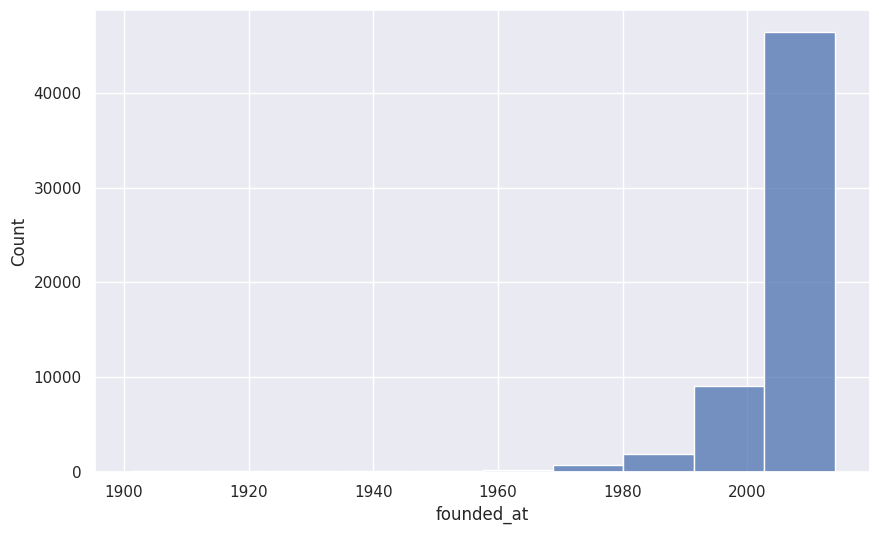

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(company.founded_at, bins = 10)


<Axes: xlabel='active_days', ylabel='Count'>

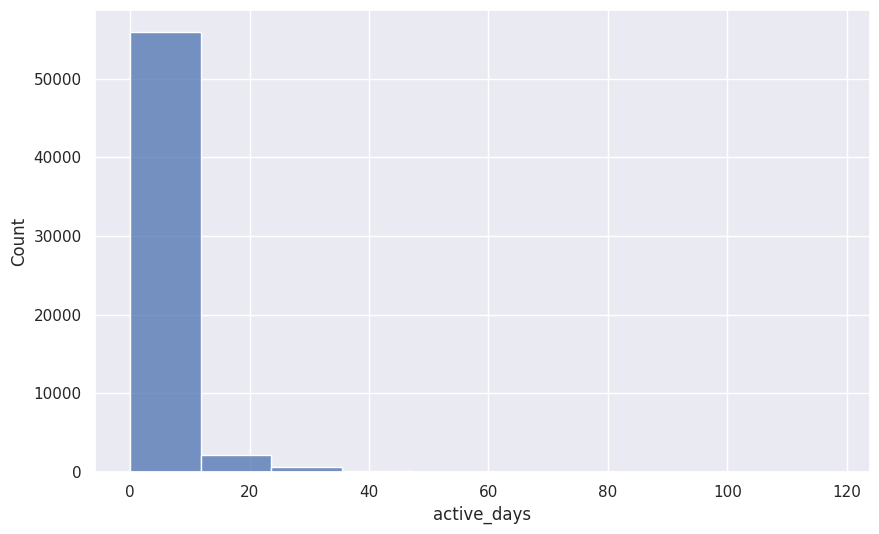

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(company.active_days, bins = 10)

<Axes: xlabel='first_milestone_at', ylabel='Count'>

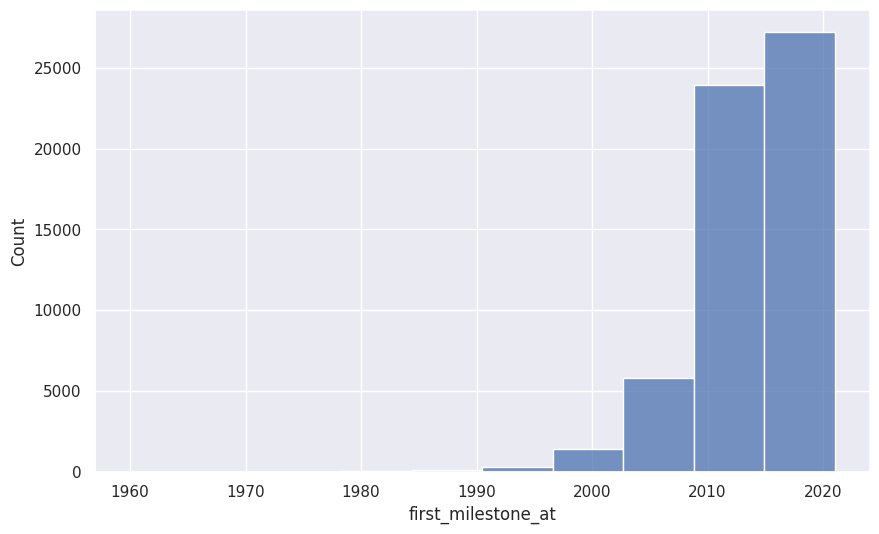

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(company.first_milestone_at, bins = 10)


<Axes: xlabel='last_milestone_at', ylabel='Count'>

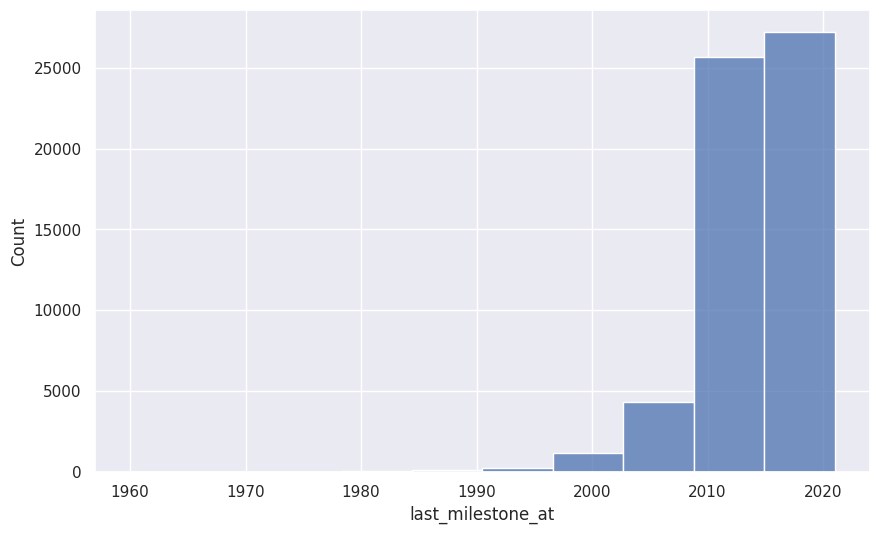

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(company.last_milestone_at, bins = 10)

#### Bivariate Analysis

Text(0, 0.5, 'count')

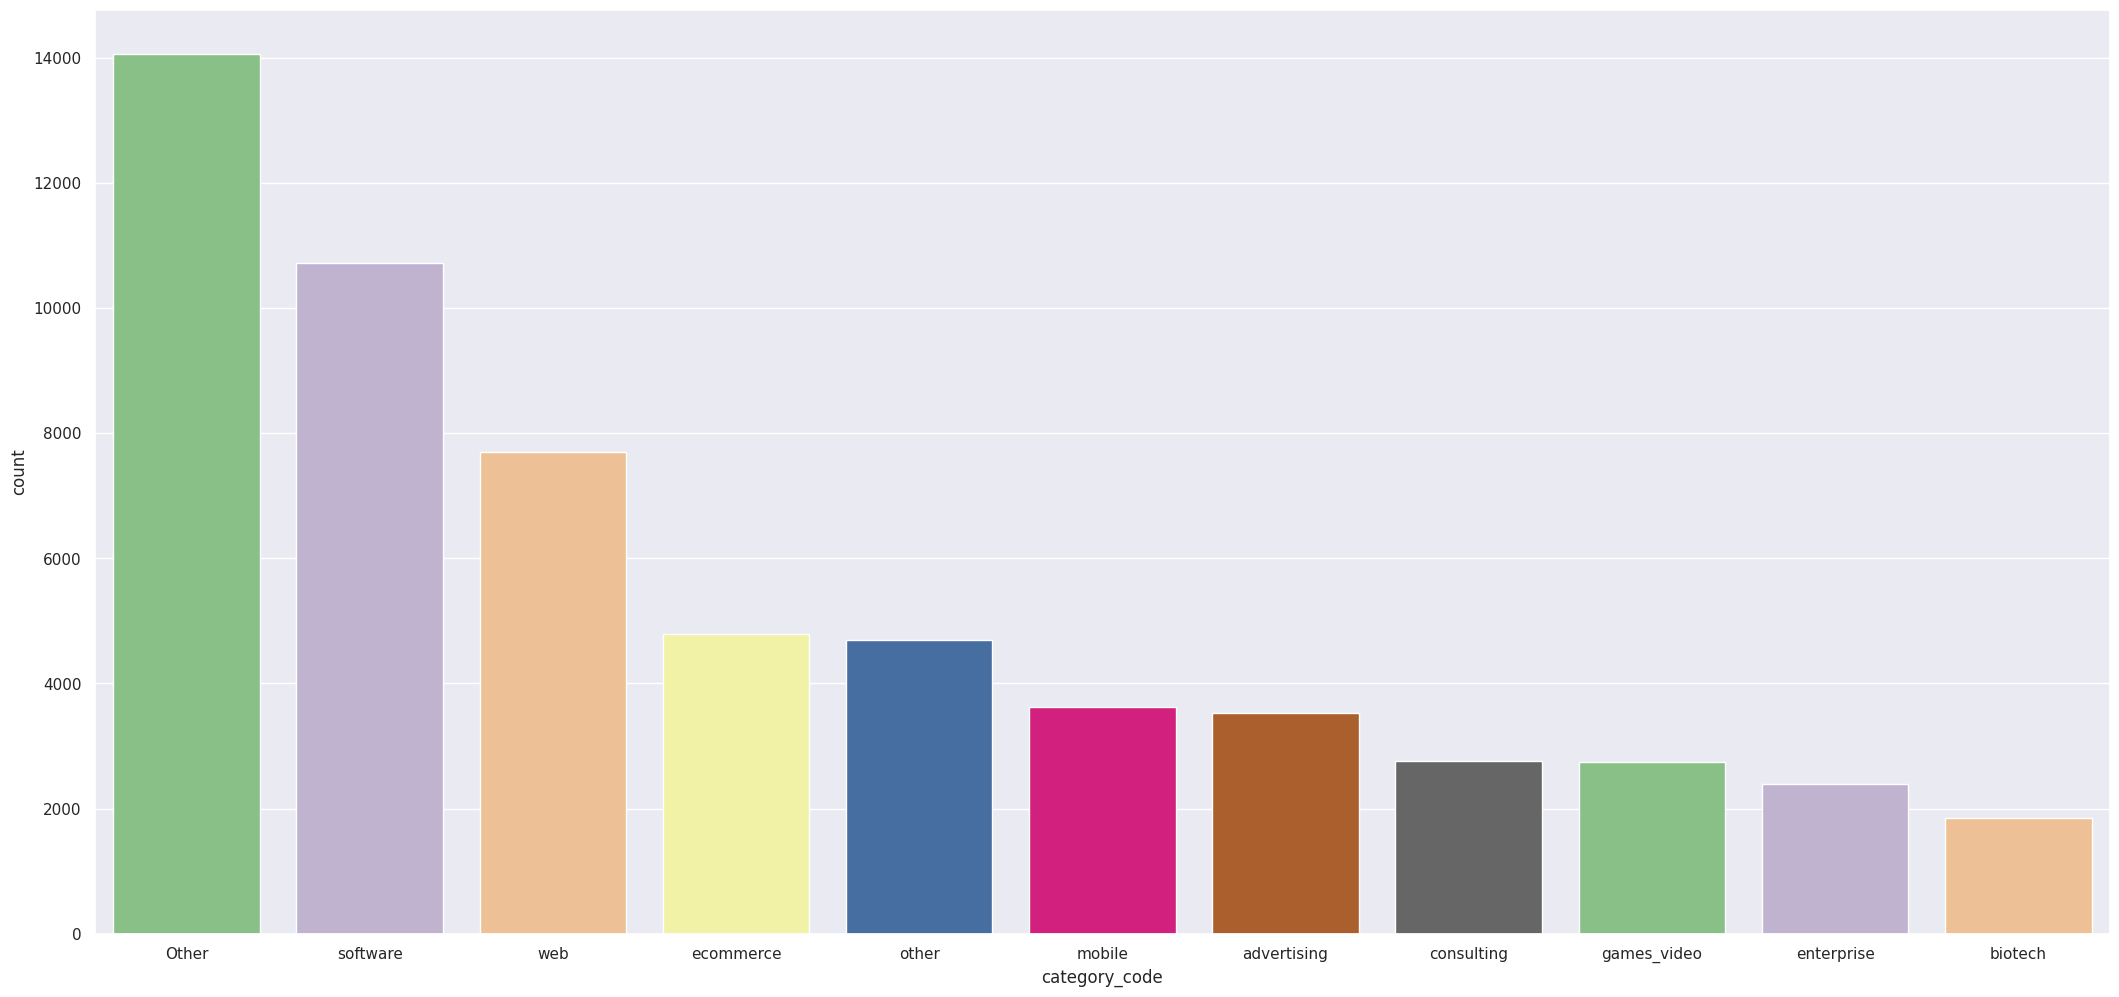

In [ ]:
# for categorical datas
# Bar graph
plt.figure(figsize=(26,12))
sns.countplot(x='category_code', data=company, order= company.category_code.value_counts().index, palette='Accent')
plt.xlabel('category_code')
plt.ylabel('count')

Text(0, 0.5, 'count')

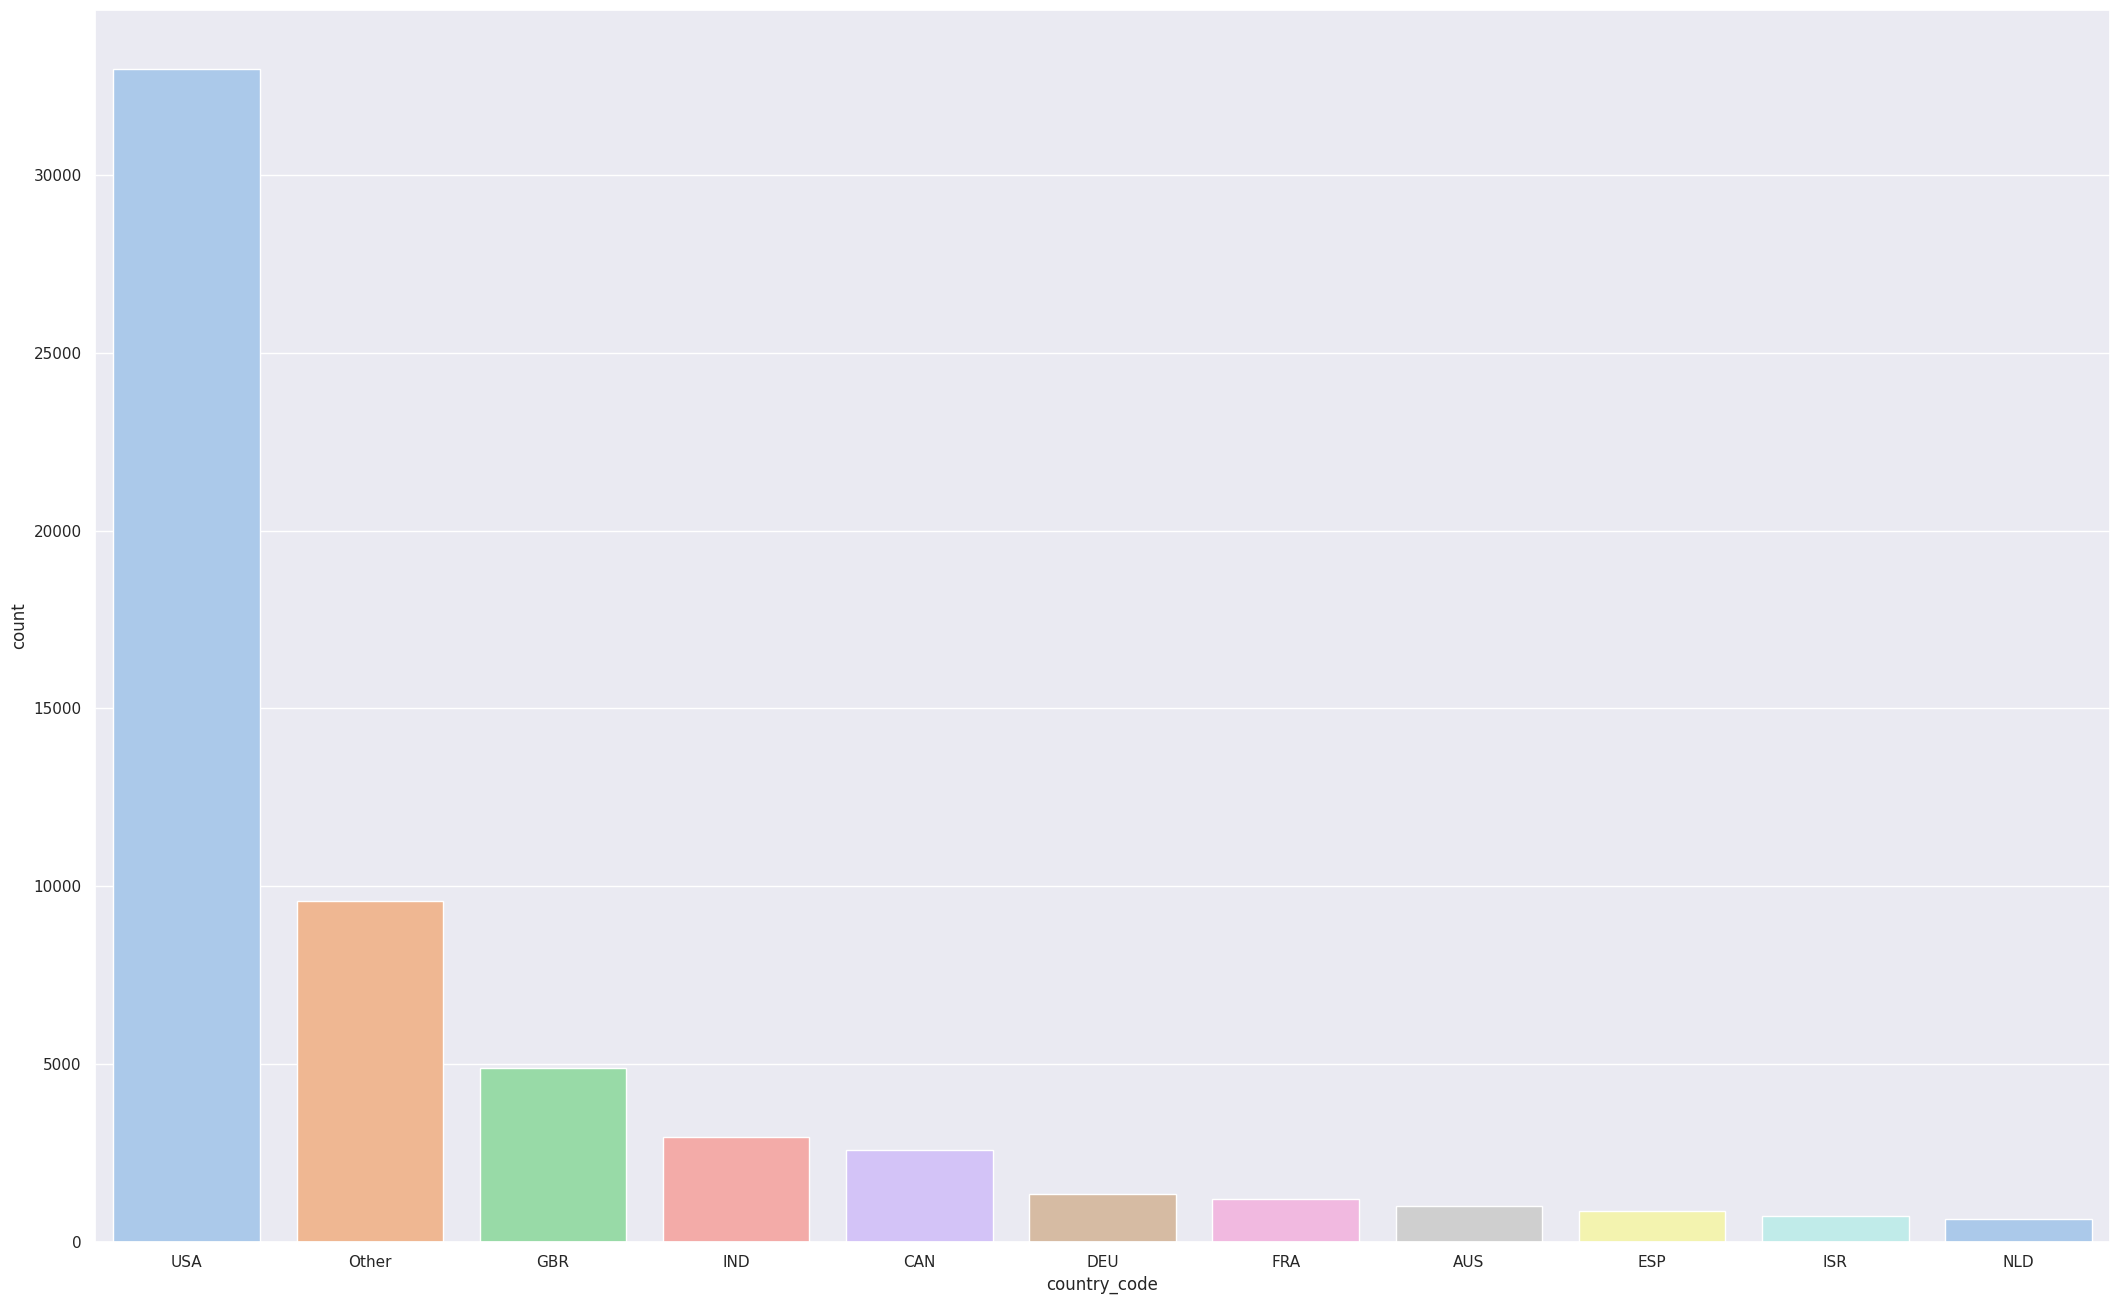

In [ ]:
plt.figure(figsize=(26,16))
sns.countplot(x='country_code', data=company, order= company.country_code.value_counts().index, palette='pastel')
plt.xlabel('country_code')
plt.ylabel('count')

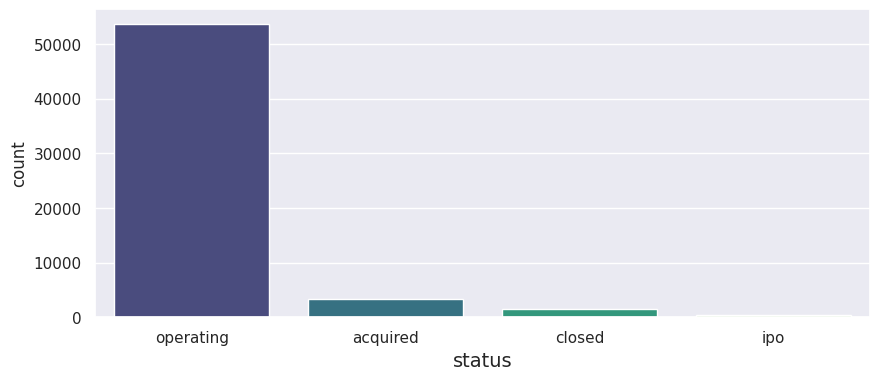

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='status' , data=company, palette='viridis')
plt.xlabel('status', fontsize=14)
plt.show()

In [ ]:
# pairplot to show the relation of each feature with every other feature
#plt.figure(figsize=(15,15))
#sns.pairplot(company)

#### Multivariate Analysis

#### Correlation Matrix

In [ ]:
company['isClosed'].value_counts()

0    54092
1     4762
Name: isClosed, dtype: int64

<Axes: >

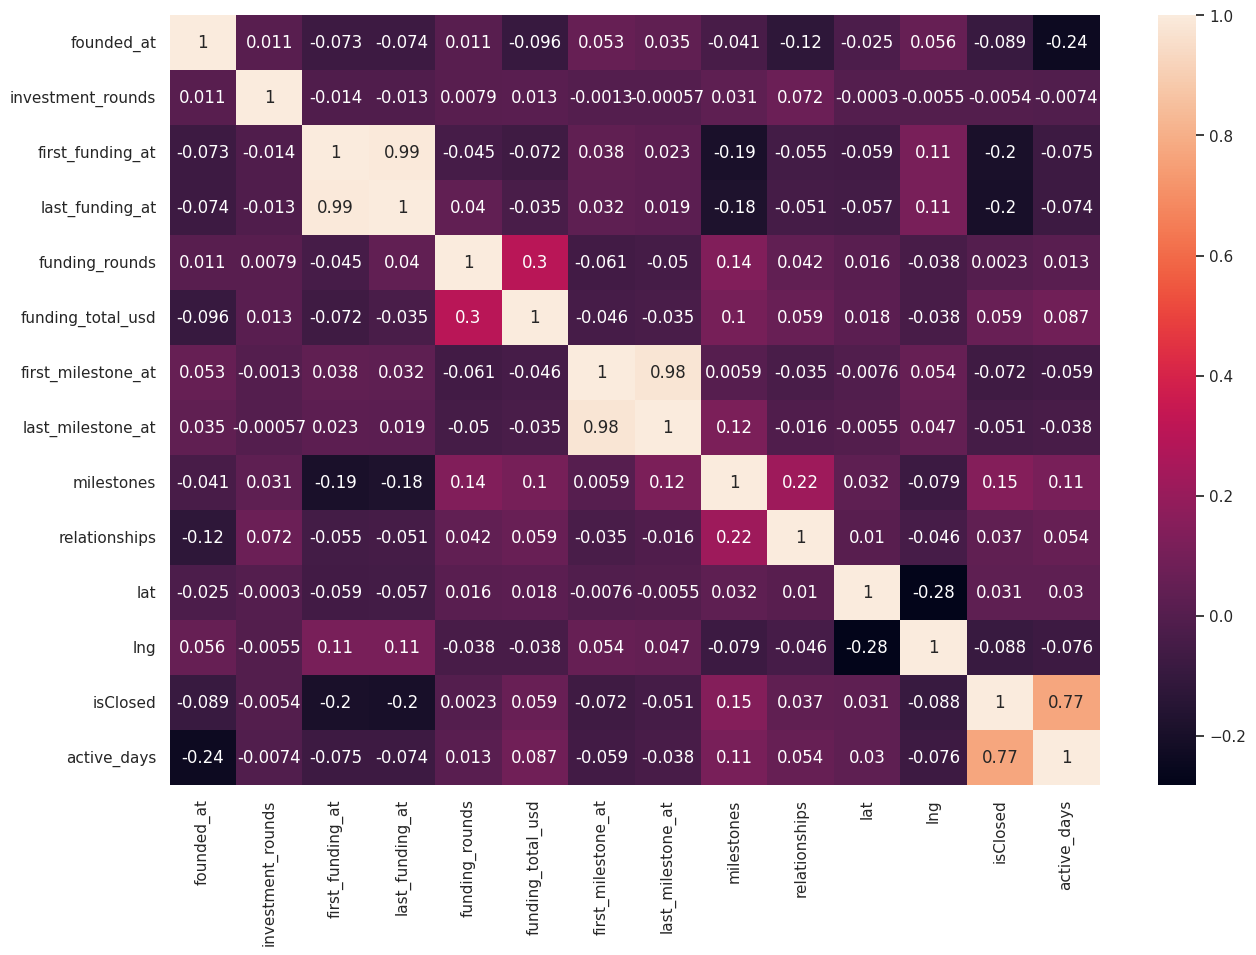

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(company.corr(), annot=True)

In [ ]:
company['status'].value_counts()

operating    53682
acquired      3291
closed        1471
ipo            410
Name: status, dtype: int64

#### Mutual Information Analysis

In [ ]:
X = company.copy()
y = X.pop("status")

#Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

# label encoding for target variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# for real valued target
from sklearn.feature_selection import mutual_info_regression

In [ ]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y_encoded, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y_encoded, discrete_features)
mi_scores

active_days            0.310584
isClosed               0.297532
last_funding_at        0.051727
first_funding_at       0.047257
founded_at             0.044805
last_investment_at     0.039249
first_investment_at    0.035495
milestones             0.018636
relationships          0.017507
first_milestone_at     0.017254
funding_total_usd      0.017047
country_code           0.016174
funding_rounds         0.014904
lng                    0.012424
lat                    0.012027
last_milestone_at      0.011196
category_code          0.006663
investment_rounds      0.000000
Name: MI Scores, dtype: float64

This indicates that the active_days has relatively high MI score which means it has a strong relation with the target variable.It suggests that changes in the "active_days" feature are informative about changes in the target variable.
Similarly, 'investment_roounds' feature does not provide much information about the target variabl as other features.

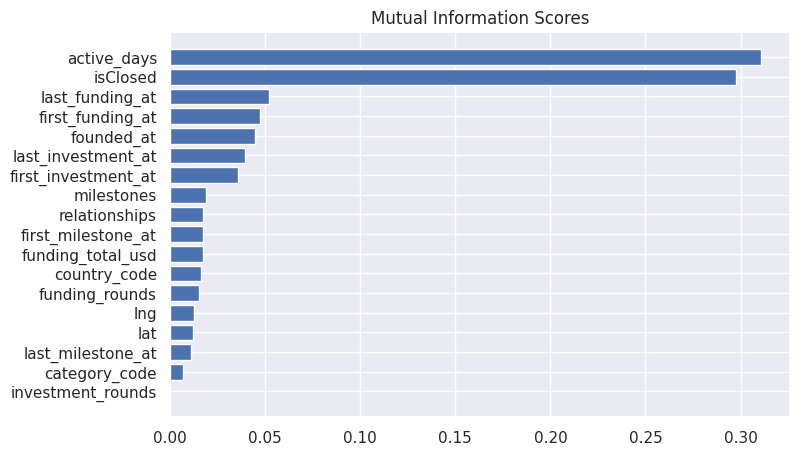

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

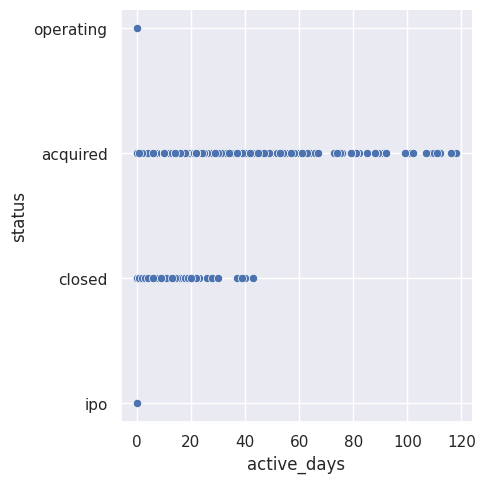

In [ ]:
sns.relplot(x="active_days", y="status", data=company);

## Principal Component Analysis

Select the features that has comparatively high MI scores so that this approach might result in a more interpretable and potentially more predictive model.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
selected_features = ['active_days', 'isClosed','founded_at', 'last_funding_at', 'first_funding_at']

X = X.loc[:, selected_features]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# # Standardize
# X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.957768,0.148835,-0.175762,0.009324,-0.000210
1,-0.961211,0.112985,-0.270142,0.022489,-0.000172
2,-0.961211,0.112985,-0.270142,0.022489,-0.000172
3,4.605541,1.510450,-0.965807,-0.491275,-0.080131
4,-0.961211,0.112985,-0.270142,0.022489,-0.000172


In [ ]:
# Define the plot_variance function
def plot_variance(pca):
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    plt.figure(figsize=(12, 6))
#Explained Variance
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='green', alpha=0.7)
    plt.title('Explained Variance by Principal Components')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
    plt.title('Cumulative Variance by Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)


    plt.subplots_adjust(wspace=5)
    plt.tight_layout()


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5
active_days,0.363110,0.591638,-0.139481,0.706148,-0.003916
isClosed,0.434197,0.490877,-0.299045,-0.693586,0.004901
founded_at,-0.033802,-0.351909,-0.926454,0.129230,0.000379
last_funding_at,-0.582641,0.377442,-0.127097,-0.037816,0.707449
first_funding_at,-0.582247,0.377759,-0.129023,-0.046507,-0.706737


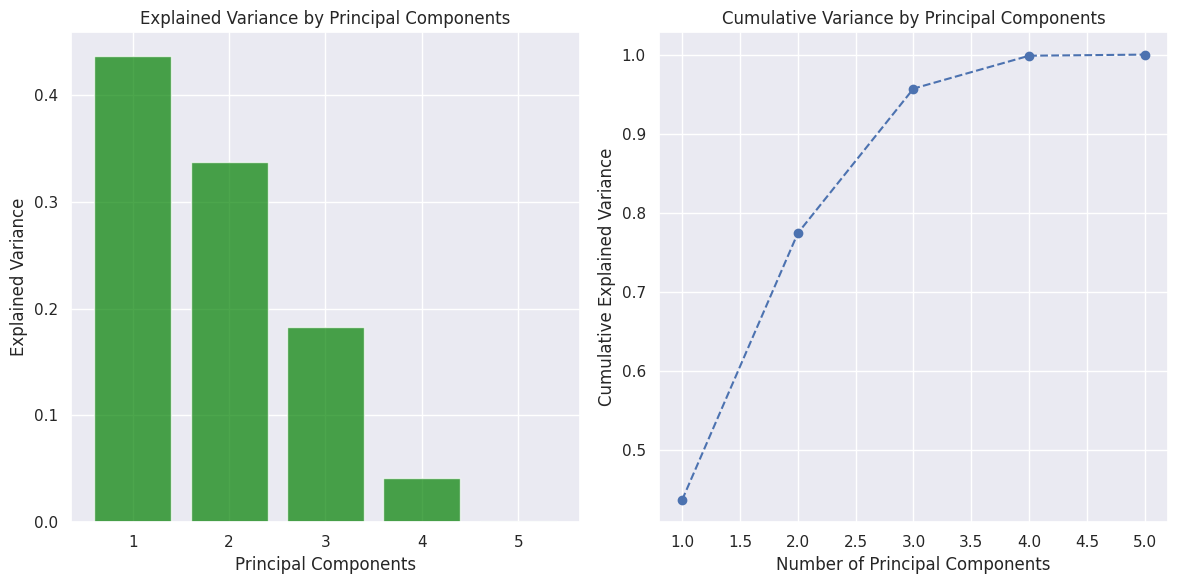

In [ ]:
plot_variance(pca);

In [ ]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC4    0.316956
PC5    0.316455
PC1    0.314823
PC2    0.312097
PC3    0.310223
Name: MI Scores, dtype: float64

In [ ]:
company.shape

(58854, 19)

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.9833489083340413


In [ ]:
from sklearn.metrics import accuracy_score

# Predict the labels for the training set
y_pred_train = model.predict(X_train)

# Calculate the accuracy of the model on the training set
training_accuracy = accuracy_score(y_train, y_pred_train)

print("Training Accuracy:", training_accuracy)


Training Accuracy: 0.9856211371407939


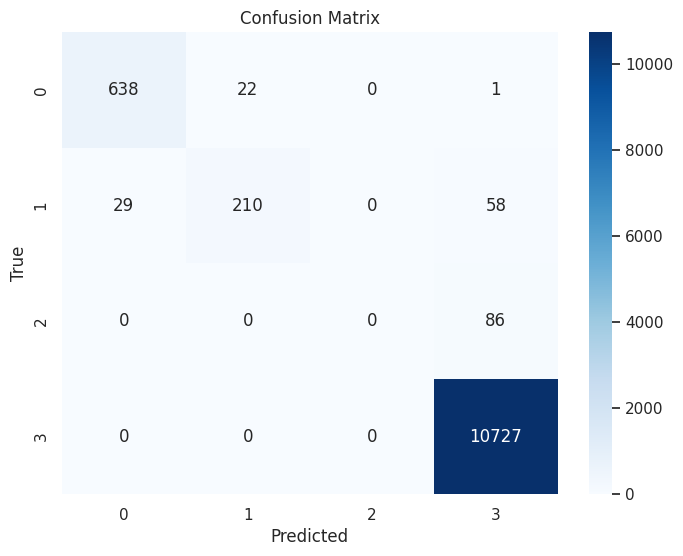

In [ ]:
# Plot confusion matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Hyperparameter tuning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(5, 10, num=15)]
min_samples_split = [2, 5, 10, 20, 50]
min_samples_leaf = [2, 6, 10, 20, 40]

In [ ]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [ ]:
# Define the base estimator (Random Forest Classifier)
rf_base = RandomForestClassifier()

In [ ]:
# Accessing best hyperparameters
print("Best hyperparameters:", rf_tuned.best_params_)
print("Best accuracy:", rf_tuned.best_score_)

Best hyperparameters: {'n_estimators': 1366, 'min_samples_split': 10, 'min_samples_leaf': 20, 'max_features': 'log2', 'max_depth': 6}
Best accuracy: 0.9182213678808431


In [ ]:
rf_tun = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 2, max_features= 'auto',max_depth = 18)

In [ ]:
from sklearn.metrics import accuracy_score

def score(model, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_pred_train = model.predict(X_train)
        accuracy_train = accuracy_score(y_train, y_pred_train)
        print("Training Accuracy:", accuracy_train)
    else:
        y_pred_test = model.predict(X_test)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        print("Testing Accuracy:", accuracy_test)

In [ ]:
rf_tun.fit(X_train, y_train)
score(rf_tun, X_train, X_test, y_train, y_test, train = True)
score(rf_tun, X_train, X_test, y_train, y_test, train = False)

Training Accuracy: 0.9370685810165028
Testing Accuracy: 0.9175940871633675


In [ ]:
# GridSearchCV
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [ ]:
params_grid = {'n_estimators': n_estimators_list,
               'criterion': criterion_list,
               'max_depth': max_depth_list,
               'min_samples_split': min_samples_split_list,
               'min_samples_leaf': min_samples_leaf_list,
               'max_features': max_features_list}

In [ ]:
model_rfg.best_params_

{'criterion': 'gini',
 'max_depth': 35,
 'max_features': 'log2',
 'min_samples_leaf': 0.001,
 'min_samples_split': 0.001,
 'n_estimators': 130}

In [ ]:
model_rf_fin = RandomForestClassifier(class_weight='balanced',
                                      criterion='gini',
                                      max_depth=55,
                                      max_features='log2',
                                      min_samples_leaf=0.001,
                                      min_samples_split=0.001,
                                      n_estimators=190)

In [ ]:
model_rf_fin.fit(X_train, y_train)
score(model_rf_fin, X_train, X_test, y_train, y_test, train = True)
score(model_rf_fin, X_train, X_test, y_train, y_test, train = False)

Training Accuracy: 0.7359131746065459
Testing Accuracy: 0.7277206694418487


In [ ]:
#Post tuning results are low then the previous default parameter, so we will go with the default parameters only.

**LINEAR DISCRIMINANT ANALYSIS**


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lda = LinearDiscriminantAnalysis()
lda_t = lda.fit_transform(X,y)

In [ ]:
lda.explained_variance_ratio_

array([0.97558017, 0.01383758, 0.01058225])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)

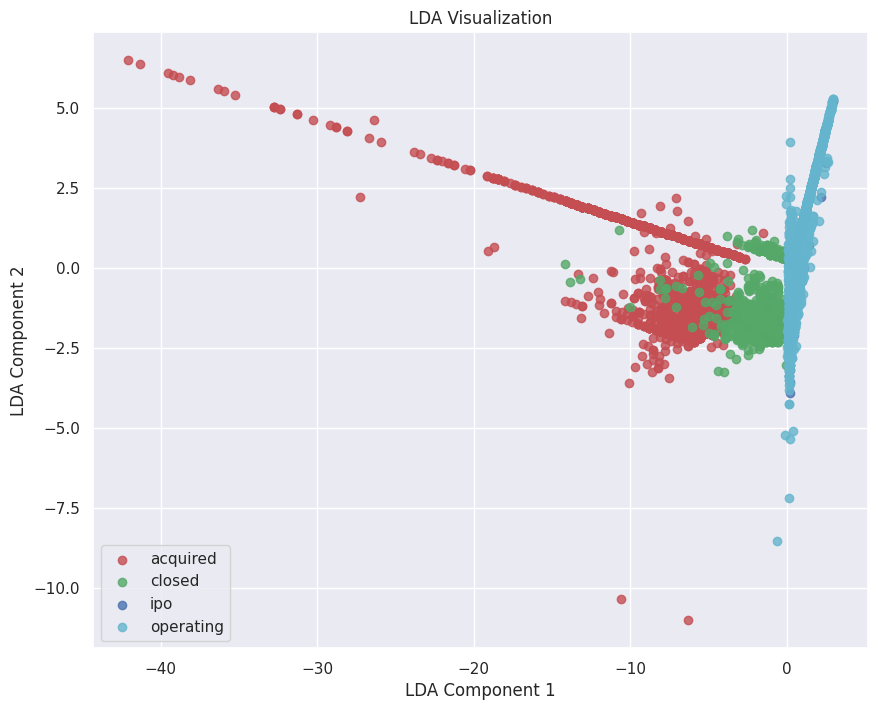

In [ ]:
# Plotting
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c']
unique_labels = np.unique(y_train)  # Get unique values in y_train

for color, target_name in zip(colors, unique_labels):
    plt.scatter(X_lda[y_train == target_name, 0], X_lda[y_train == target_name, 1], alpha=.8, color=color,
                label=target_name)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization')
plt.legend(loc='best')
plt.show()


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=2)

In [ ]:
y_pred = lda.predict(X_test)
print("Accuracy of LDA is:",accuracy_score(y_test,y_pred))

Accuracy of LDA is: 0.9534462252930849


In [ ]:
confusion_matrix(y_test,y_pred)

array([[  871,   109,     0,    40],
       [   14,   104,     0,   318],
       [    0,     1,    25,    92],
       [    0,     4,   244, 15835]])

In [ ]:
min1,max1 = lda_t[:,0].min()-1, lda_t[:,0].max()+1
min2,max2 = lda_t[:,1].min()-1,lda_t[:,1].max()+1
x1grid = np.arange(min1,max1,0.1)
x2grid = np.arange(min2,max2,0.1)
xx,yy = np.meshgrid(x1grid,x2grid)
r1,r2 = xx.flatten(),yy.flatten()
r1,r2 = r1.reshape((len(r1),1)), r2.reshape((len(r2),1))
grid = np.hstack((r1,r2))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification

# Generating sample data
X, y = make_classification(n_samples=100, n_features=2, n_classes=3, n_clusters_per_class=1,
                           n_informative=2, n_redundant=0, n_repeated=0, random_state=42)

In [ ]:
# Creating and fitting the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis()

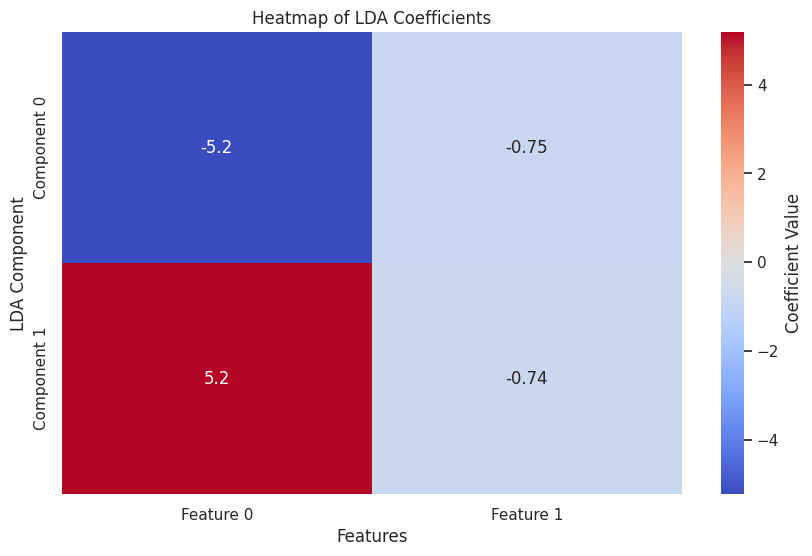

In [ ]:
# Plotting heatmap of coefficients
plt.figure(figsize=(10, 6))
sns.heatmap(lda.scalings_, annot=True, cmap="coolwarm", xticklabels=[f'Feature {i}' for i in range(X.shape[1])],
            yticklabels=[f'Component {i}' for i in range(len(lda.classes_) - 1)], cbar_kws={'label': 'Coefficient Value'})
plt.title('Heatmap of LDA Coefficients')
plt.xlabel('Features')
plt.ylabel('LDA Component')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming X and y are your dataset
X_hat = lda.fit_transform(X, y)

# Assuming lda is your trained Linear Discriminant Analysis (LDA) model
lda = LinearDiscriminantAnalysis()

# Get colormap colors and categories
colors = mpl.cm.get_cmap(name='tab20').colors
categories = pd.Categorical(pd.Series(y)).categories

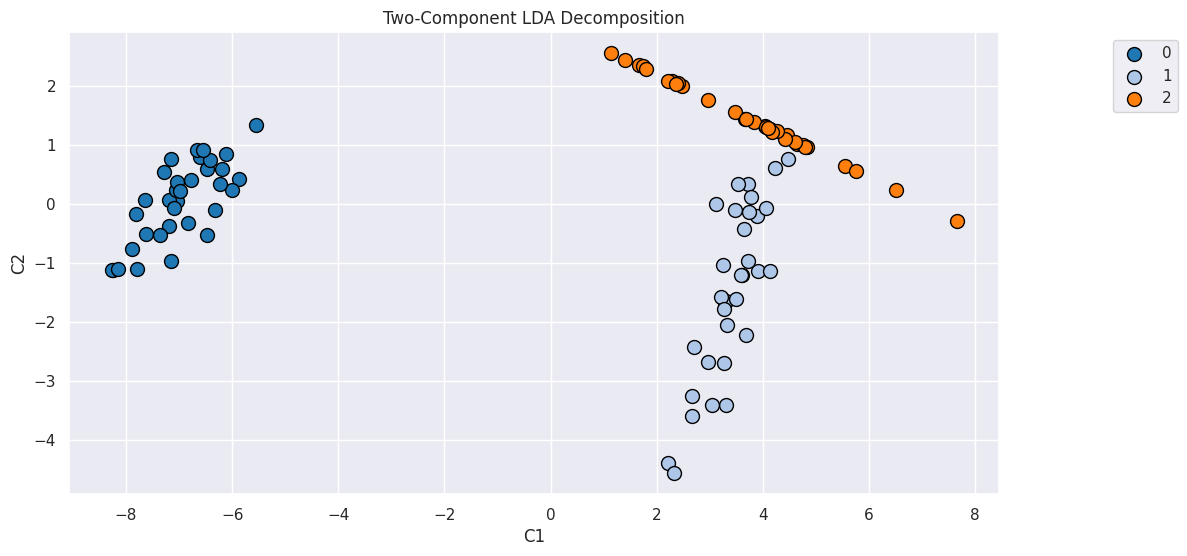

In [ ]:
# Create DataFrame with transformed features and class labels
ret = pd.DataFrame({'C1': X_hat[:, 0], 'C2': X_hat[:, 1], 'Type': pd.Categorical(pd.Series(y))})

# Create the scatter plot
fig, ax = plt.subplots(1, figsize=(12, 6))

for col, cat in zip(colors, categories):
    (ret.query('Type == @cat')
        .plot.scatter(x='C1', y='C2', color=col, label=cat, ax=ax,
                      s=100, edgecolor='black', linewidth=1,
                      title='Two-Component LDA Decomposition')
    ).legend(bbox_to_anchor=(1.2, 1))

plt.show()

In [ ]:
#average accuracy score across all cross-validation iterations.
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import numpy as np

# Assuming model is your classifier, X is your feature matrix, and y is your target variable
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9533333333333331


In [ ]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Grouping the DataFrame by status
grouped = company.groupby('status')
grouped

In [ ]:
import pandas as pd

def analyze_group(group):

    mean_value = group.mean()
    max_value = group.max()
    return {'mean': mean_value, 'max': max_value}

results = grouped.apply(analyze_group)

print(results)


status
acquired     {'mean': [2000.5815861440292, 4.34883249830993...
closed       {'mean': [2007.2739632902787, 4.39202778260846...
ipo          {'mean': [1984.8731707317072, 4.69043675553034...
operating    {'mean': [2006.0048433366865, 4.40283683211701...
dtype: object


In [ ]:
# Define a function to apply to each group
def analyze_group(group):
    mean_values = group.mean()
    median_values = group.median()
    max_values = group.max()
    min_values = group.min()

    # Return the results
    return mean_values, median_values, max_values, min_values

results = grouped.apply(analyze_group)

In [ ]:
# Calculate mean vectors for each class
class_means = []
for status in company['status'].unique():
    class_means.append(company[company['status'] == status].mean())

In [ ]:
mean_vec = company.mean()
mean_vec = mean_vec.values.reshape(-1, 1)
print(mean_vec)

[[ 2.00558609e+03]
 [ 4.40155039e+00]
 [ 2.01774753e+03]
 [ 2.01789695e+03]
 [ 1.38825862e+00]
 [ 3.27778291e+06]
 [ 2.01482319e+03]
 [ 2.01512545e+03]
 [ 1.34508155e+00]
 [ 3.76510695e+00]
 [ 3.71726937e+01]
 [-4.85177042e+01]
 [ 8.09120875e-02]
 [ 1.23927006e+00]]


In [ ]:
non_numeric_columns = company.select_dtypes(exclude=np.number).columns

dataset_encoded = pd.get_dummies(company, columns=non_numeric_columns)
X = dataset_encoded.drop(columns=['founded_at']).values
y = dataset_encoded['founded_at'].values

In [ ]:
# Standardize the features
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

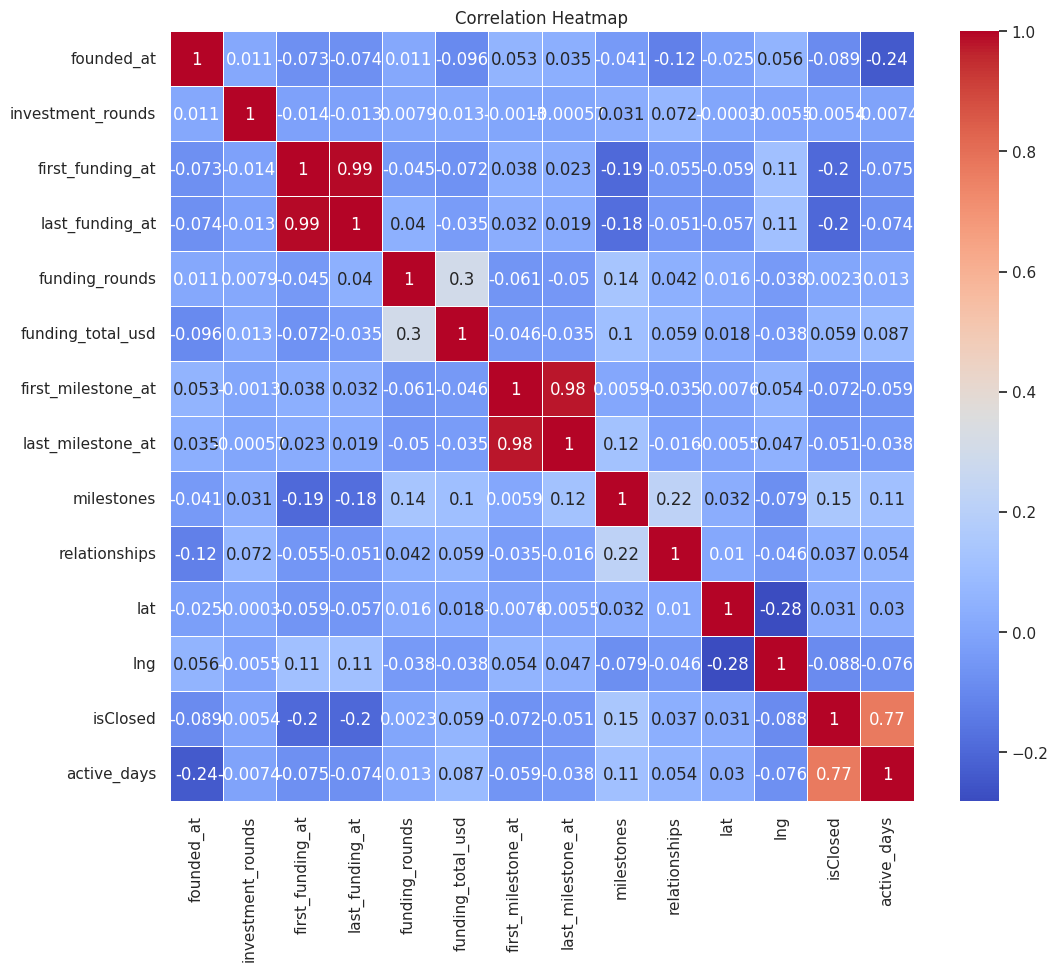

In [ ]:
correlation_matrix = company.corr(numeric_only = True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array(['operating', 'operating', 'operating', ..., 'operating',
       'operating', 'operating'], dtype=object)

**PIPELINE**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

sns.set()
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
X = company.copy()
y = company[['isClosed']]
yClosed = X.pop('isClosed')
X.columns

Index(['category_code', 'status', 'founded_at', 'country_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng', 'active_days'],
      dtype='object')

In [ ]:
X = X[[
    'founded_at', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships'
]]
X.columns

Index(['founded_at', 'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships'],
      dtype='object')

In [ ]:
closed = yClosed.value_counts(); print(closed)

0    54092
1     4762
Name: isClosed, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
yClosed_train = y_train.iloc[:,0]
yClosed_test = y_test.iloc[:,0]

In [ ]:
stdscaler = StandardScaler()
scaler = MinMaxScaler()

pca = PCA(n_components=5)

In [ ]:
# Make predictions on the test data
predictions = ensemble_model.predict(X_test)

In [ ]:
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()

In [ ]:
# Defining estimators for ensemble
estimators = [('Logistic Regression', log_reg), ('Decision Tree', decision_tree)]
estimators

[('Logistic Regression', LogisticRegression()),
 ('Decision Tree', DecisionTreeClassifier())]

In [ ]:
# Creating ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=estimators, voting='soft')  # 'soft' for probabilities voting
ensemble_model

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('Decision Tree', DecisionTreeClassifier())],
                 voting='soft')

In [ ]:
# Create pipeline with PCA and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', LogisticRegression())
])

In [ ]:
model_ensemble = Pipeline([
    ('stdscaler', stdscaler),
    ('pca', pca),
    ('classifier', ensemble_model)
])

In [ ]:
model_ensemble.fit(X_train, yClosed_train)

Pipeline(steps=[('stdscaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier',
                 VotingClassifier(estimators=[('Logistic Regression',
                                               LogisticRegression()),
                                              ('Decision Tree',
                                               DecisionTreeClassifier())],
                                  voting='soft'))])

In [ ]:
pred = model_ensemble.predict(X_test)

In [ ]:
print('test accuracy = ', round(accuracy_score(yClosed_test, pred)*100, 2), '%')

test accuracy =  89.16 %


In [ ]:
print(classification_report(yClosed_test, pred, digits=3))

              precision    recall  f1-score   support

           0      0.927     0.957     0.942     10801
           1      0.253     0.162     0.197       970

    accuracy                          0.892     11771
   macro avg      0.590     0.559     0.570     11771
weighted avg      0.872     0.892     0.881     11771



In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predicted_log_reg = log_reg.predict(X_test)

In [ ]:
import pandas as pd
y_test_list = y_test.tolist() if isinstance(y_test, pd.Series) else y_test
predicted_log_reg_list = predicted_log_reg.tolist() if isinstance(predicted_log_reg, pd.Series) else predicted_log_reg

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [ ]:
param_distributions = {
    'clf__C': uniform(0.001, 100),
    'clf__penalty': ['l1', 'l2'],
}

In [ ]:
# Perform randomized search with 5-fold cross-validation
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('clf', LogisticRegression())]),
                   param_distributions={'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e0b1a1696f0>,
                                        'clf__class_weight': [None, 'balanced'],
                                        'clf__penalty': ['l1', 'l2'],
                                        'clf__solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy')

In [ ]:
# Get the best estimator
best_estimator = random_search.best_estimator_

In [ ]:
test_score = best_estimator.score(X_test, y_test)
print("Test Set Score:", test_score)

Test Set Score: 0.916404723472942
